In [709]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline     

In [710]:
df = pd.read_csv('attacks.csv', encoding='Windows-1252' )

#Abro el archivo .csv

In [711]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [712]:
df.columns
#Tras varias pruebas con errores examino las columnas y encuentro el espacio en 'Sex' y en 'Species'

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [713]:
df = df[['Case Number','Year', 'Country', 'Area', 'Sex ', 'Species ', 'Injury', 'Fatal (Y/N)']]
# Ahora si puedo elejir las columnas con las que voy a trabajar

df.head(3) #Muestro las 3 primeras filas para verificar que solo estan las seleccionadas

,Case Number,Year,Country,Area,Sex,Species,Injury,Fatal (Y/N)
0,2018.06.25,2018.0,USA,California,F,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,2018.0,USA,Georgia,F,NaN,Minor injury to left thigh,N
2,2018.06.09,2018.0,USA,Hawaii,M,NaN,Injury to left lower leg from surfboard skeg,N


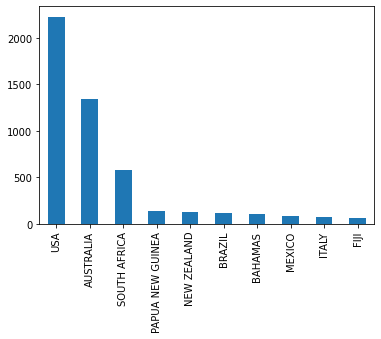

In [714]:
df_Country = df["Country"].value_counts().sort_values(ascending=False)[:10].plot.bar()

# Estados Unidos es el pais que mas ataques recibe de tiburones

In [715]:
value_species = df['Species '].value_counts()
value_species.head(8)

#Ya tengo el dato de las tres especies de tiburones que mas ataques confirmados ha realizado

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
4' shark                                               40
Name: Species , dtype: int64

In [695]:
''''
Como mi investigacion se va a centrar en obtener datos para saber en que areas 
de los Estados Unidos hay mas ataques de tiburones, las 3 especies que mas ataques realizan y el area donde mas atacan
sigo reduciendo el dataframe para quedarme con los valores con los que quiero trabajar
'''''

df = df[df['Species '].isin(['White shark', 'Tiger shark', 'Bull shark'])]

df.head(5)
#de esta manera he conseguido dejar un dataframe de 288 filas y 7 columnas

,Case Number,Year,Country,Area,Sex,Species,Injury,Fatal (Y/N)
0,2018.06.25,2018.0,USA,California,F,White shark,"No injury to occupant, outrigger canoe and pad...",N
6,2018.06.03.a,2018.0,BRAZIL,Pernambuco,M,Tiger shark,FATAL,Y
18,2018.04.28.b,2018.0,COSTA RICA,Cocos Island,M,Tiger shark,"No injury, shark bit scuba gear",N
23,2018.04.23,2018.0,MALDIVES,Alifu Alifu Atoll,M,Tiger shark,5-inch cut to hand,N
30,2018.04.14,2018.0,BAHAMAS,New Providence,M,Tiger shark,No Injury. Shark swam away with the surf board,N


In [696]:
df = df[df['Country'] == 'USA'] #Sigo reduciendo y me quedo con los casos ocurridos en USA
df

,Case Number,Year,Country,Area,Sex,Species,Injury,Fatal (Y/N)
0,2018.06.25,2018.0,USA,California,F,White shark,"No injury to occupant, outrigger canoe and pad...",N
53,2017.12.31,2017.0,USA,Hawaii,F,Tiger shark,Severe lacerations to left thigh & knee,N
120,2017.07.11,2017.0,USA,California,M,White shark,"No injury, kayak bitten",N
140,2017.05.28,2017.0,USA,Florida,M,Tiger shark,Lacerations to right arm,N
169,2017.03.18,2017.0,USA,California,M,White shark,"No injury, kayak bitten",N
...,...,...,...,...,...,...,...,...
5041,1930.07.11,1930.0,USA,Florida,M,Tiger shark,Arm lacerated from shoulder to wrist,N
5598,1898.00.00.f,1898.0,USA,South Carolina,M,White shark,Lacerations to left hand,N
5836,1879.00.00,1879.0,USA,Mississippi,M,Tiger shark,FATAL,Y
6007,1853.09.28,1853.0,USA,North Carolina,M,White shark,No injury. Copper breastplate & harness bitten,N


<AxesSubplot:xlabel='Species ', ylabel='count'>

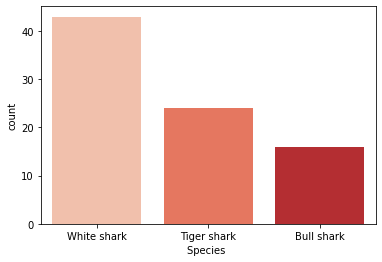

In [697]:
sns.countplot(x=df['Species '], palette="Reds")

In [698]:
#df['Case Number']
#df['Species '].unique()
df.Area.unique() #Asi identifico los estados en los que se han producido estos ataques

array(['California', 'Hawaii', 'Florida', 'North Carolina', 'Alabama',
       'Oregon', 'Texas', 'Washington', 'South Carolina', 'Mississippi'],
      dtype=object)

In [699]:
df_states=df.Area.value_counts() # Asi ya tenemos informacion sobre cuales son los estados que reciben mas ataques
df_states

California        32
Hawaii            16
Florida           14
North Carolina     9
Oregon             5
South Carolina     2
Alabama            2
Mississippi        1
Washington         1
Texas              1
Name: Area, dtype: int64

<AxesSubplot:xlabel='Species ', ylabel='count'>

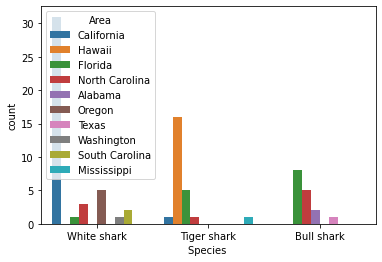

In [700]:
sns.countplot(x=df['Species '], hue=df['Area']) 

#Represento los ataques de cada especie seleccionada en cada una de las areas

In [701]:
#Obtengo el numero de casos por ataque de tiburon una vez reducido nuestro dataframe y nos devuelve el nnumero de ataques realizados por cada una de las especies en estados unidos

df['Species '].value_counts()

White shark    43
Tiger shark    24
Bull shark     16
Name: Species , dtype: int64

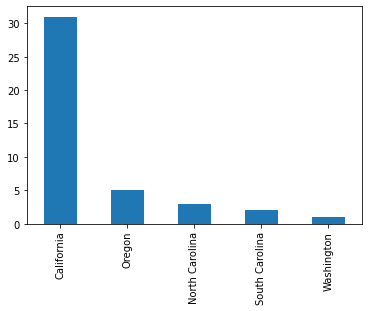

In [702]:
df_species = df[df['Species '] == "White shark"]["Area"].value_counts().sort_values(ascending=False)[:5].plot.bar()

#California es el estado que recibe mas ataques del tiburon blanco

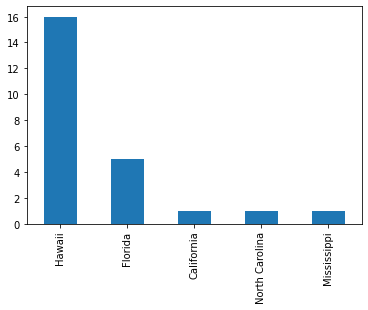

In [703]:
df_species = df[df['Species '] == "Tiger shark"]["Area"].value_counts().sort_values(ascending=False)[:5].plot.bar()

#Hawaii es la zona mas afectada por el tiburon tigre


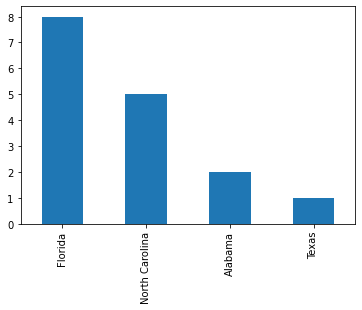

In [704]:
df_species = df[df['Species '] == "Bull shark"]["Area"].value_counts().sort_values(ascending=False)[:5].plot.bar()

#Florida es la mas perjudicada por ataques del tiburon toro
